In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
from workflow.fullframe_overlay import ReconstructVideoClassificationInference
import pandas as pd
from pathlib import Path

inference_path = "/cs-share/pradalier/tmp/judo/data/fullframe_inference"
frames_path = "/cs-share/pradalier/tmp/judo/frames"

# get the last dataframe
paths = sorted(Path(inference_path).glob("**/output.json"))

df = pd.read_json(paths[-1])
df.head()

,labels,path,prob
0,"[Match, Match Intro, Match Outro, Not Match]",/cs-share/pradalier/tmp/judo/frames/mat_10/000...,"[1.889657141873613e-07, 0.9999996423721311, 1...."
1,"[Match, Match Intro, Match Outro, Not Match]",/cs-share/pradalier/tmp/judo/frames/mat_10/000...,"[2.1275302231060767e-07, 0.9999995231628411, 1..."
2,"[Match, Match Intro, Match Outro, Not Match]",/cs-share/pradalier/tmp/judo/frames/mat_10/000...,"[2.229809012987971e-07, 0.9999996423721311, 1...."
3,"[Match, Match Intro, Match Outro, Not Match]",/cs-share/pradalier/tmp/judo/frames/mat_10/000...,"[1.6101999733564288e-07, 0.9999996423721311, 1..."
4,"[Match, Match Intro, Match Outro, Not Match]",/cs-share/pradalier/tmp/judo/frames/mat_10/000...,"[2.924324462583172e-07, 0.999999403953552, 2.5..."


In [16]:
task = ReconstructVideoClassificationInference
clean = task._preprocess(df)
clean.head()

,labels,path,prob,mat,batch_id,frame_id,predicted_index,predicted_label,Match,Match Intro,Match Outro,Not Match
timestamp,,,,,,,,,,,,
3000,"[Match, Match Intro, Match Outro, Not Match]",/cs-share/pradalier/tmp/judo/frames/mat_10/000...,"[1.889657141873613e-07, 0.9999996423721311, 1....",10,5,0,1,Match Intro,1.889657e-07,1.000000,1.393019e-08,1.530130e-07
3001,"[Match, Match Intro, Match Outro, Not Match]",/cs-share/pradalier/tmp/judo/frames/mat_10/000...,"[2.1275302231060767e-07, 0.9999995231628411, 1...",10,5,1,1,Match Intro,2.127530e-07,1.000000,1.505136e-08,1.802642e-07
3002,"[Match, Match Intro, Match Outro, Not Match]",/cs-share/pradalier/tmp/judo/frames/mat_10/000...,"[2.229809012987971e-07, 0.9999996423721311, 1....",10,5,2,1,Match Intro,2.229809e-07,1.000000,1.091402e-08,1.226285e-07
3003,"[Match, Match Intro, Match Outro, Not Match]",/cs-share/pradalier/tmp/judo/frames/mat_10/000...,"[1.6101999733564288e-07, 0.9999996423721311, 1...",10,5,3,1,Match Intro,1.610200e-07,1.000000,1.437529e-08,1.976602e-07
3004,"[Match, Match Intro, Match Outro, Not Match]",/cs-share/pradalier/tmp/judo/frames/mat_10/000...,"[2.924324462583172e-07, 0.999999403953552, 2.5...",10,5,4,1,Match Intro,2.924324e-07,0.999999,2.576071e-08,2.248828e-07


In [17]:
# pad the data
padded = task._pad_df(clean)
padded.head()

,labels,path,prob,mat,batch_id,frame_id,predicted_index,predicted_label,Match,Match Intro,Match Outro,Not Match
timestamp,,,,,,,,,,,,
2940,"[Match, Match Intro, Match Outro, Not Match]",/cs-share/pradalier/tmp/judo/frames/mat_10/000...,"[1.889657141873613e-07, 0.9999996423721311, 1....",10,5,0,1,Match Intro,1.889657e-07,1.0,1.393019e-08,1.530130e-07
2941,"[Match, Match Intro, Match Outro, Not Match]",/cs-share/pradalier/tmp/judo/frames/mat_10/000...,"[1.889657141873613e-07, 0.9999996423721311, 1....",10,5,0,1,Match Intro,1.889657e-07,1.0,1.393019e-08,1.530130e-07
2942,"[Match, Match Intro, Match Outro, Not Match]",/cs-share/pradalier/tmp/judo/frames/mat_10/000...,"[1.889657141873613e-07, 0.9999996423721311, 1....",10,5,0,1,Match Intro,1.889657e-07,1.0,1.393019e-08,1.530130e-07
2943,"[Match, Match Intro, Match Outro, Not Match]",/cs-share/pradalier/tmp/judo/frames/mat_10/000...,"[1.889657141873613e-07, 0.9999996423721311, 1....",10,5,0,1,Match Intro,1.889657e-07,1.0,1.393019e-08,1.530130e-07
2944,"[Match, Match Intro, Match Outro, Not Match]",/cs-share/pradalier/tmp/judo/frames/mat_10/000...,"[1.889657141873613e-07, 0.9999996423721311, 1....",10,5,0,1,Match Intro,1.889657e-07,1.0,1.393019e-08,1.530130e-07


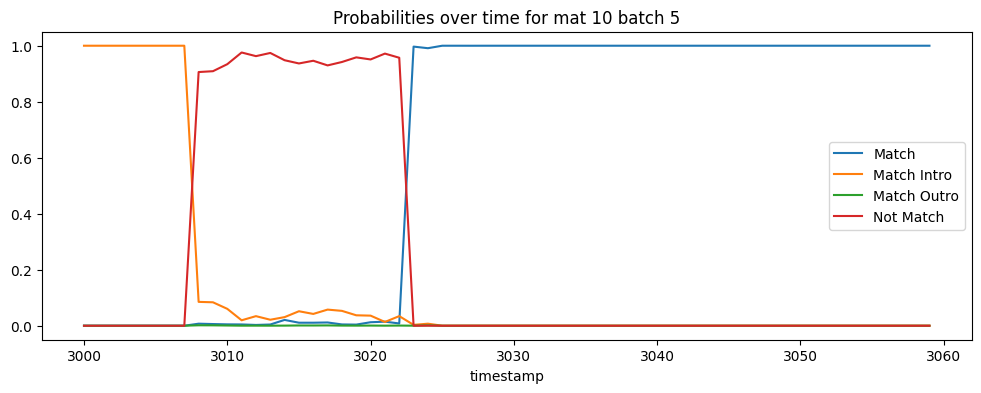

In [14]:
task._plot(padded.iloc[0:60])